#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Andre Nicolai Gutiérrez Bautista A01793606
*   Javier Munoz Barrios A01794423
*   Fernando Ivan Ramos Esparza A01373377
*   Javier de Alba Pérez A01226046


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. 
El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí: 
https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104  
 
Y el conjunto de datos utilizado es el de la siguiente liga de la UCI: 
https://archive.ics.uci.edu/ml/datasets/Facebook+metrics 
El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas. 

El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en 
Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el 
artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. 

Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando 
determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás 
considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”, 
“Lifetime People who have liked a Page and engaged with a post” y “Likes”.   

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from locale import D_FMT
import numpy as np 
import pandas as pd
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, make_scorer

from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, learning_curve, cross_validate, GridSearchCV 
from sklearn.datasets import make_regression

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt


In [ ]:
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

download_and_unzip(zip_url,'./')

#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables 
que indican los autores en la Tabla 3 del artículo citado. 


In [ ]:
csv_path = './dataset_Facebook.csv'
data = pd.read_csv(csv_path,sep=";")
df =  data.copy()
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'}, inplace=True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df1 = df[['Category','Page total likes','Type','Post Month','Post Weekday','Post Hour','Paid','LPE']]
df1.columns = ['Category','PageTotalLikes','Type','PostMonth','PostWeekday','PostHour','Paid','LPE']
df1

,Category,PageTotalLikes,Type,PostMonth,PostWeekday,PostHour,Paid,LPE
0,2,139441,Photo,12,4,3,0.0,119
1,2,139441,Status,12,3,10,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,2,10,1.0,1386
4,2,139441,Photo,12,2,3,0.0,396
...,...,...,...,...,...,...,...,...
495,3,85093,Photo,1,7,2,0.0,392
496,2,81370,Photo,1,5,8,0.0,301
497,1,81370,Photo,1,5,2,0.0,363
498,3,81370,Photo,1,4,11,0.0,370


In [ ]:
df['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y 
validación.  


In [ ]:
X = df1.iloc[:,:-1]  
Y = df1.iloc[:,-1] 
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=100)  

In [ ]:
print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada para entrenamiento y validación
(100, 7) : dimensión de datos de entrada para prueba
(400,) : dimensión de variable de salida para entrenamiento y validación
(100,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [ ]:
def mi_RMSE(y_actual, y_predicted):
  return math.sqrt(np.square(np.subtract(y_actual,y_predicted)).mean())

def mi_MAE(y_actual, y_predicted):
  return np.mean(np.abs(y_actual - y_predicted))

def mi_MAPE(y_actual, y_predicted):
  return np.mean(np.abs((y_actual - y_predicted)/y_actual))

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras 
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo 
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información.

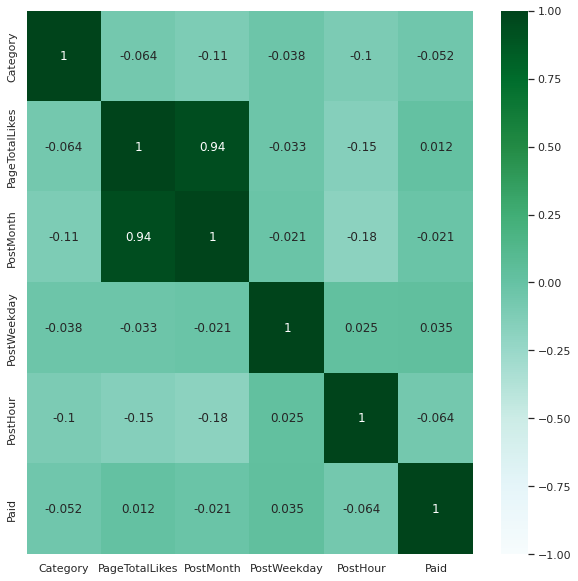

In [ ]:
sns.set(rc={'figure.figsize':(10,10)}) 
sns.heatmap(Xtv.corr(method="pearson"), vmin=-1,vmax=1,cmap='BuGn',annot=True)
plt.show()

In [ ]:
#Checar por datos nulos
Xtv.isnull().sum()

Category          0
PageTotalLikes    0
Type              0
PostMonth         0
PostWeekday       0
PostHour          0
Paid              1
dtype: int64

In [ ]:
Xtv.Paid = Xtv.Paid.fillna(Xtv.Paid.mean())
Xtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 107 to 236
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        400 non-null    int64  
 1   PageTotalLikes  400 non-null    int64  
 2   Type            400 non-null    object 
 3   PostMonth       400 non-null    int64  
 4   PostWeekday     400 non-null    int64  
 5   PostHour        400 non-null    int64  
 6   Paid            400 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


In [ ]:
# Transformaciones a factores numéricos:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['Category',	'PageTotalLikes',	'PostMonth',	'PostWeekday',	'PostHour']

# Transformaciones a factores categóricos:
#catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
#catImp_pipeline_nombres = ['Type']

#Transformaciones a factores binarios:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
catOHE_pipeline_nombres = ['Paid', 'Type']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. Consulta su documentación correspondiente:  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Xtv, ytv, train_size=300)

In [ ]:
# Encontrar errores RMSE, MAE y MAPE 
modeloDummy = DummyRegressor(strategy='mean')
modeloDummy.fit(X_train, y_train)
yhat = modeloDummy.predict(X_val)
# RMSE
RMSE = mi_RMSE(y_val,yhat)
print('RMSE:',RMSE)
# MAE
MAE= mi_MAE(y_val,yhat)
print('MAE:',MAE)
# MAPE 
MAPE= mi_MAPE(y_val,yhat) # yHat
print('MAPE:',MAPE)

RMSE: 566.0138912704449
MAE: 385.2593333333332
MAPE: 2.001369093851741


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. 

Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. 

En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.  

In [ ]:
def get_models():
  modelos, nombres = list(), list()

  # técnica y nombre: LogisticReg
  modelos.append(LogisticRegression(max_iter=10000))
  nombres.append("LogisticReg")

  # técnica y nombre: RandForest
  modelos.append(RandomForestClassifier())
  nombres.append("RandForest")

  # técnica y nombre: MLP
  modelos.append(MLPRegressor())
  nombres.append("MLPRegressor")


  return modelos, nombres

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
    
  kfold = RepeatedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {'RMSE':make_scorer(mi_RMSE),
                 'MAE':make_scorer(mi_MAE),
                 'MAPE':make_scorer(mi_MAPE)} #No sabemos por que falla

  resultados_modelo_train = cross_validate(pipeline,Xtv, ytv,scoring=mismetricas,cv=kfold)
  resultados_modelo_test = cross_validate(pipeline,Xtest, ytest,scoring=mismetricas,cv=kfold)
  delta_train_sz = np.linspace(0.1, 1.0, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelos[i] ,    
                                                         X = Xtv,
                                                         y = ytv,
                                                         cv = kfold ,
                                                         train_sizes = delta_train_sz,
                                                         random_state=11)
  resultados.append(resultados_modelo_train) 
  
  print('-------- ',modelos[i],'----------------------------------------')
  print('Prueba\n%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_modelo_train['test_RMSE']),
                                                                          np.std(resultados_modelo_train['test_RMSE']), 
                                                                          np.mean(resultados_modelo_train['test_MAE']),
                                                                          np.std(resultados_modelo_train['test_MAE']), 
                                                                          np.mean(resultados_modelo_train['test_MAPE']),
                                                                          np.std(resultados_modelo_train['test_MAPE']), 
                                                                          ))
  
  print('Validación\n%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_modelo_test['test_RMSE']),
                                                                          np.std(resultados_modelo_test['test_RMSE']), 
                                                                          np.mean(resultados_modelo_test['test_MAE']),
                                                                          np.std(resultados_modelo_test['test_MAE']), 
                                                                          np.mean(resultados_modelo_test['test_MAPE']),
                                                                          np.std(resultados_modelo_test['test_MAPE']),
                                                                          ))
  


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


--------  LogisticRegression(max_iter=10000) ----------------------------------------
Prueba
LogisticReg:
mean RMSE: 659.308 (148.4109)
mean MAE: 345.779 (72.1115)
mean MAPE: 0.832 (0.3837)

Validación
LogisticReg:
mean RMSE: 583.009 (161.3349)
mean MAE: 340.913 (92.2751)
mean MAPE: 0.720 (0.3025)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


--------  RandomForestClassifier() ----------------------------------------
Prueba
RandForest:
mean RMSE: 688.953 (130.0474)
mean MAE: 383.422 (71.4909)
mean MAPE: 1.418 (0.6682)

Validación
RandForest:
mean RMSE: 699.659 (136.3147)
mean MAE: 385.407 (80.5544)
mean MAPE: 0.819 (0.3387)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encode

--------  MLPRegressor() ----------------------------------------
Prueba
MLPRegressor:
mean RMSE: 765.479 (101.0874)
mean MAE: 462.972 (56.6132)
mean MAPE: 0.733 (0.1297)

Validación
MLPRegressor:
mean RMSE: 716.917 (225.7236)
mean MAE: 515.460 (144.7757)
mean MAPE: 0.861 (0.0342)



#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación 
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que 
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 


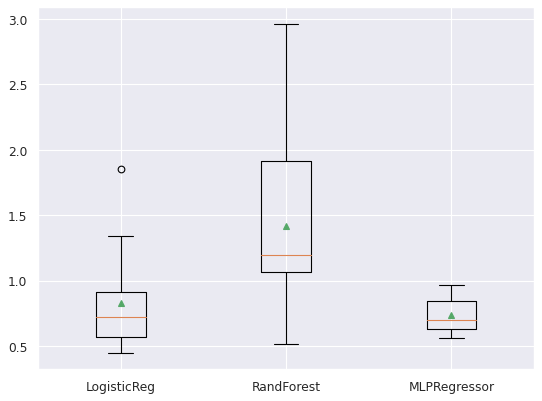

In [ ]:
bpGmean = list()
plt.figure(figsize=(8, 6), dpi=80)
for i in range(len(resultados)):
  bpGmean.append(resultados[i]['test_MAPE'])
plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [ ]:
def mi_searchCV(modelo, dicc_gridm):
  kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=3)
  lPipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
  lGrid = GridSearchCV(
        n_jobs=-1,
        estimator= lPipeline, cv=kfold, 
        param_grid=dicc_gridm)
  Xx = columnasTransformer.fit_transform(Xtv)
  result = lGrid.fit(Xtv, np.ravel(ytv))
  print('Mejor valor de exactitud obtenido con la mejor combinación:', lGrid.best_score_)
  print('Mejor combinación de valores encontrados de los hiperparámetros:', lGrid.best_params_)
  return result

In [ ]:
grid = {
          'm__hidden_layer_sizes':[(10,5), (12,6)],
          'm__alpha':[0.0001, 0.001, 0.005],
          'm__learning_rate_init':[0.0001],
        }
modelo_MLP = mi_searchCV(modelos[2], grid)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


Mejor valor de exactitud obtenido con la mejor combinación: -1.050087098619903
Mejor combinación de valores encontrados de los hiperparámetros: {'m__alpha': 0.005, 'm__hidden_layer_sizes': (12, 6), 'm__learning_rate_init': 0.0001}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de 
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

In [ ]:
def importanciaDeFactores(modelo):
  importance = permutation_importance(modelo, X_train, y_train, n_repeats=10)
  for i,v in enumerate(importance['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i,v))
  plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
  plt.show()

Feature: 0, Score: 0.00002
Feature: 1, Score: -0.00002
Feature: 2, Score: 0.00040
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00001


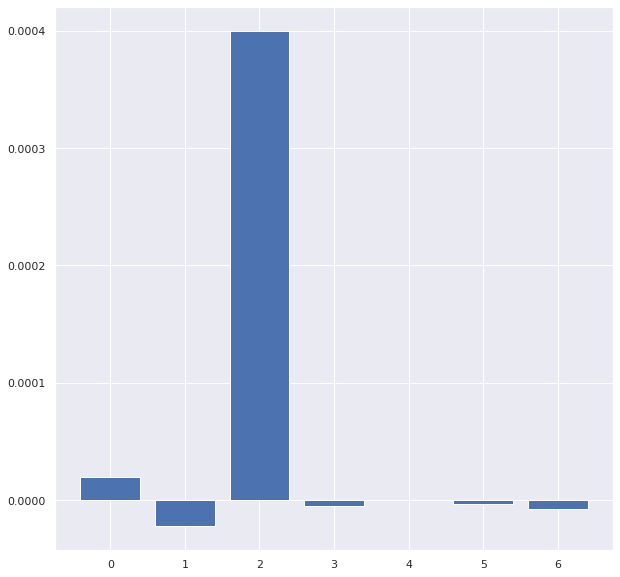

In [ ]:
importanciaDeFactores(modelo_MLP)

#**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [ ]:
grid = {
         'm__ccp_alpha':np.linspace(0.0,1.0,10),
              'm__criterion':['gini','entropy'],
              'm__max_depth': range(1,10),
              'm__min_samples_split': range(2,4),# usualmente 2 
              'm__class_weight':[None,'balanced'], #automatizar con un map
        }
modelo_RF = mi_searchCV(modelos[1], grid)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [ ]:
importanciaDeFactores(modelo_RF)

#**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [ ]:
grid = [{'m__C':[0.0001,0.01,0.1,1.0,10.,100.],
          'm__solver':['saga'],
          'm__class_weight':[None,'balanced'],
          'm__penalty':['l1']
        },
        {'m__C':[0.0001,0.01,0.1,1.0,10.,100.],
         'm__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'm__class_weight':[None,'balanced'],
         'm__penalty':['l2']
        },
        {'m__C':[0.0001,0.01,0.1,1.0,10.,100.],
         'm__solver':['saga'],
         'm__class_weight':[None,'balanced'],
         'm__penalty':['elasticnet'],
         'm__l1_ratio':[0.1,0.5]
        }]
modelo_LR = mi_searchCV(modelos[0], grid)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000


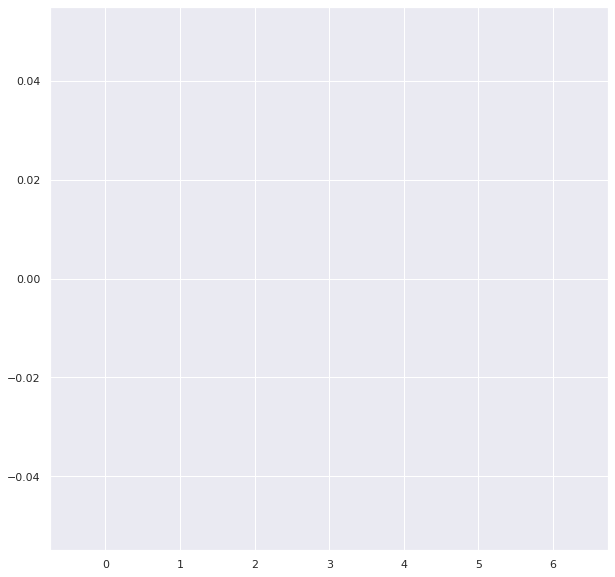

In [ ]:
importanciaDeFactores(modelo_LR)

#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con 
respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

In [ ]:
None

###**Fin de la Actividad de la semana 7.**